In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


# Adjusting the configuration of the plots to be created

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Reading in our Data

df = pd.read_csv(r'C:\Users\Robert\Downloads\moviedata.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking for Missing Values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Dropping all rows that have Missing Values

df = df.dropna()

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Looking @ Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing Data Types

df['votes'] = df['votes'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [9]:
# Correcting 'Year' , 'Released'

df['year_of_release'] = df['released'].astype(str).str.extract(pat = '([0-9]{4})').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [10]:
# Dropping Columns w/ Errors

df.drop(['year', 'released'], axis = 1, inplace = True)

In [11]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

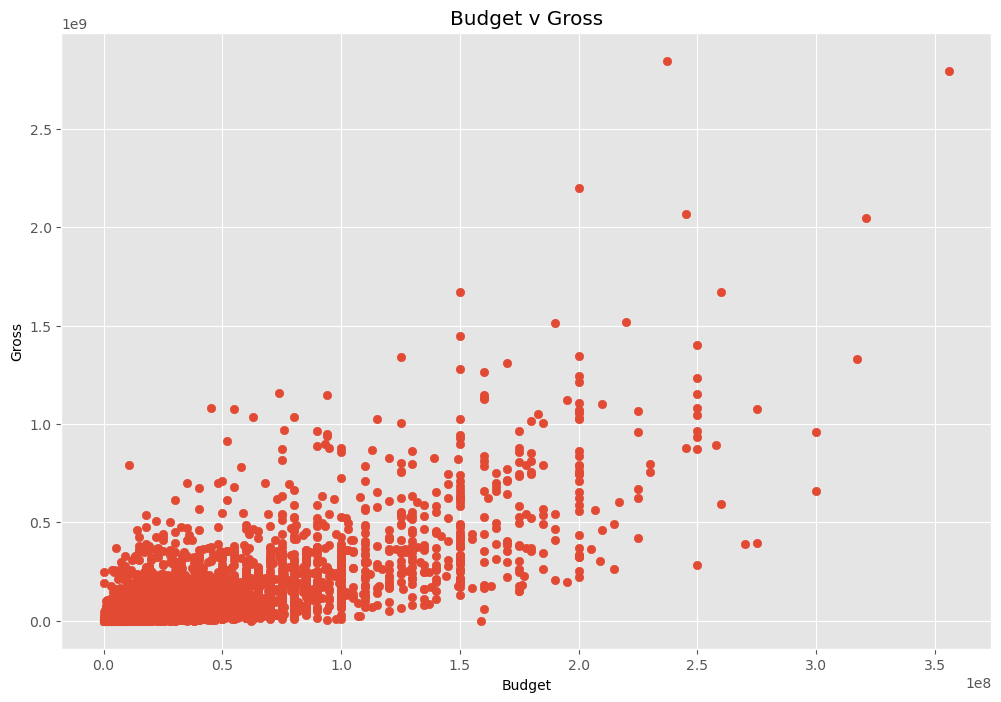

In [12]:
# Budget v Gross Scatter Plot

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget v Gross')

plt.xlabel('Budget')

plt.ylabel('Gross')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

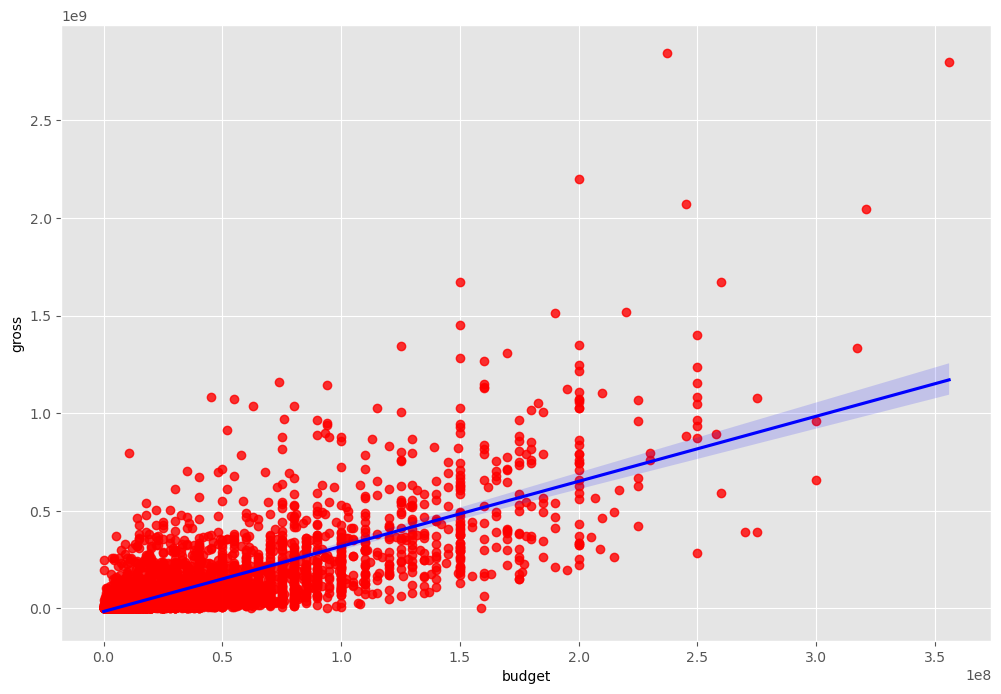

In [13]:
# Plotting Budget v Gross using Seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [14]:
# Looking @ Correlation

In [15]:
df.corr(numeric_only = True)

,score,votes,budget,gross,runtime,year_of_release
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_of_release,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


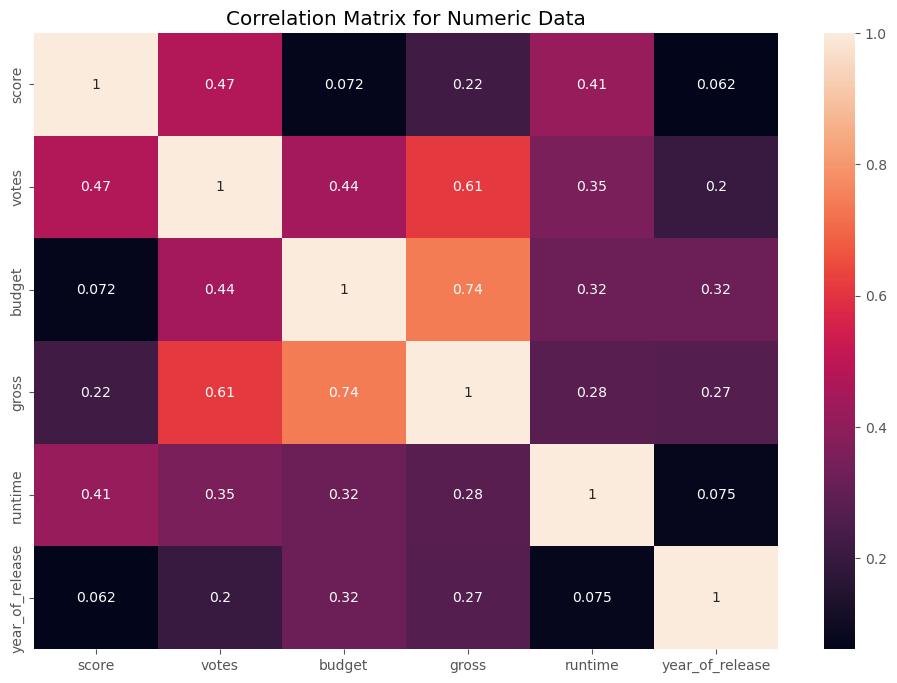

In [16]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Data')

plt.show()

In [17]:
df_enum = df

for col_name in df_enum.columns:
    if(df_enum[col_name].dtype == 'object'): 
        df_enum[col_name] = df_enum[col_name].astype('category') 
        df_enum[col_name] = df_enum[col_name].cat.codes
        
df_enum

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,2015
2434,2969,5,0,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,1994
3681,1595,3,6,6.8,43000,952,1683,527,6,5000000,2554,466,108,2001
272,2909,6,9,3.9,2300,261,55,1473,47,800000,2270,582,85,1982


In [18]:
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,2015
2434,2969,5,0,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,1994
3681,1595,3,6,6.8,43000,952,1683,527,6,5000000,2554,466,108,2001
272,2909,6,9,3.9,2300,261,55,1473,47,800000,2270,582,85,1982


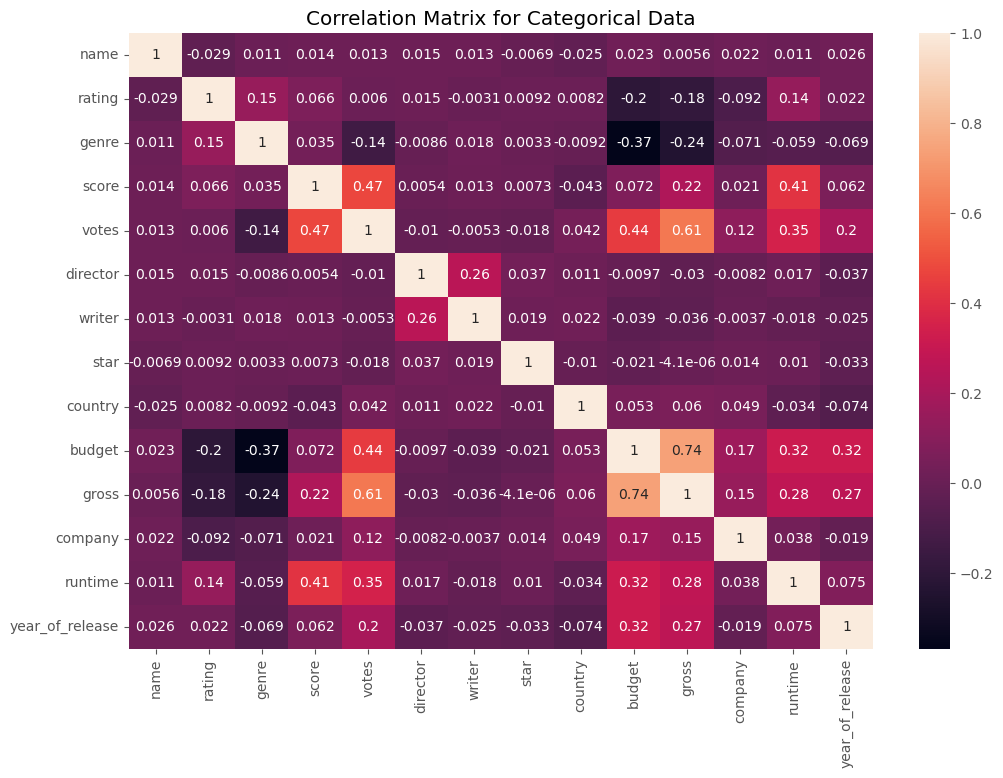

In [19]:
correlation_matrix = df_enum.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Categorical Data')

plt.show()

In [20]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre            budget            -0.368523
budget           genre             -0.368523
genre            gross             -0.244101
gross            genre             -0.244101
rating           budget            -0.203946
                                      ...   
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year_of_release  year_of_release    1.000000
Length: 196, dtype: float64

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross            votes              0.614751
votes            gross              0.614751
budget           gross              0.740247
gross            budget             0.740247
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year_of_release  year_of_release    1.000000
dtype: float64